# Predicting survival chances of Titanic Passengers

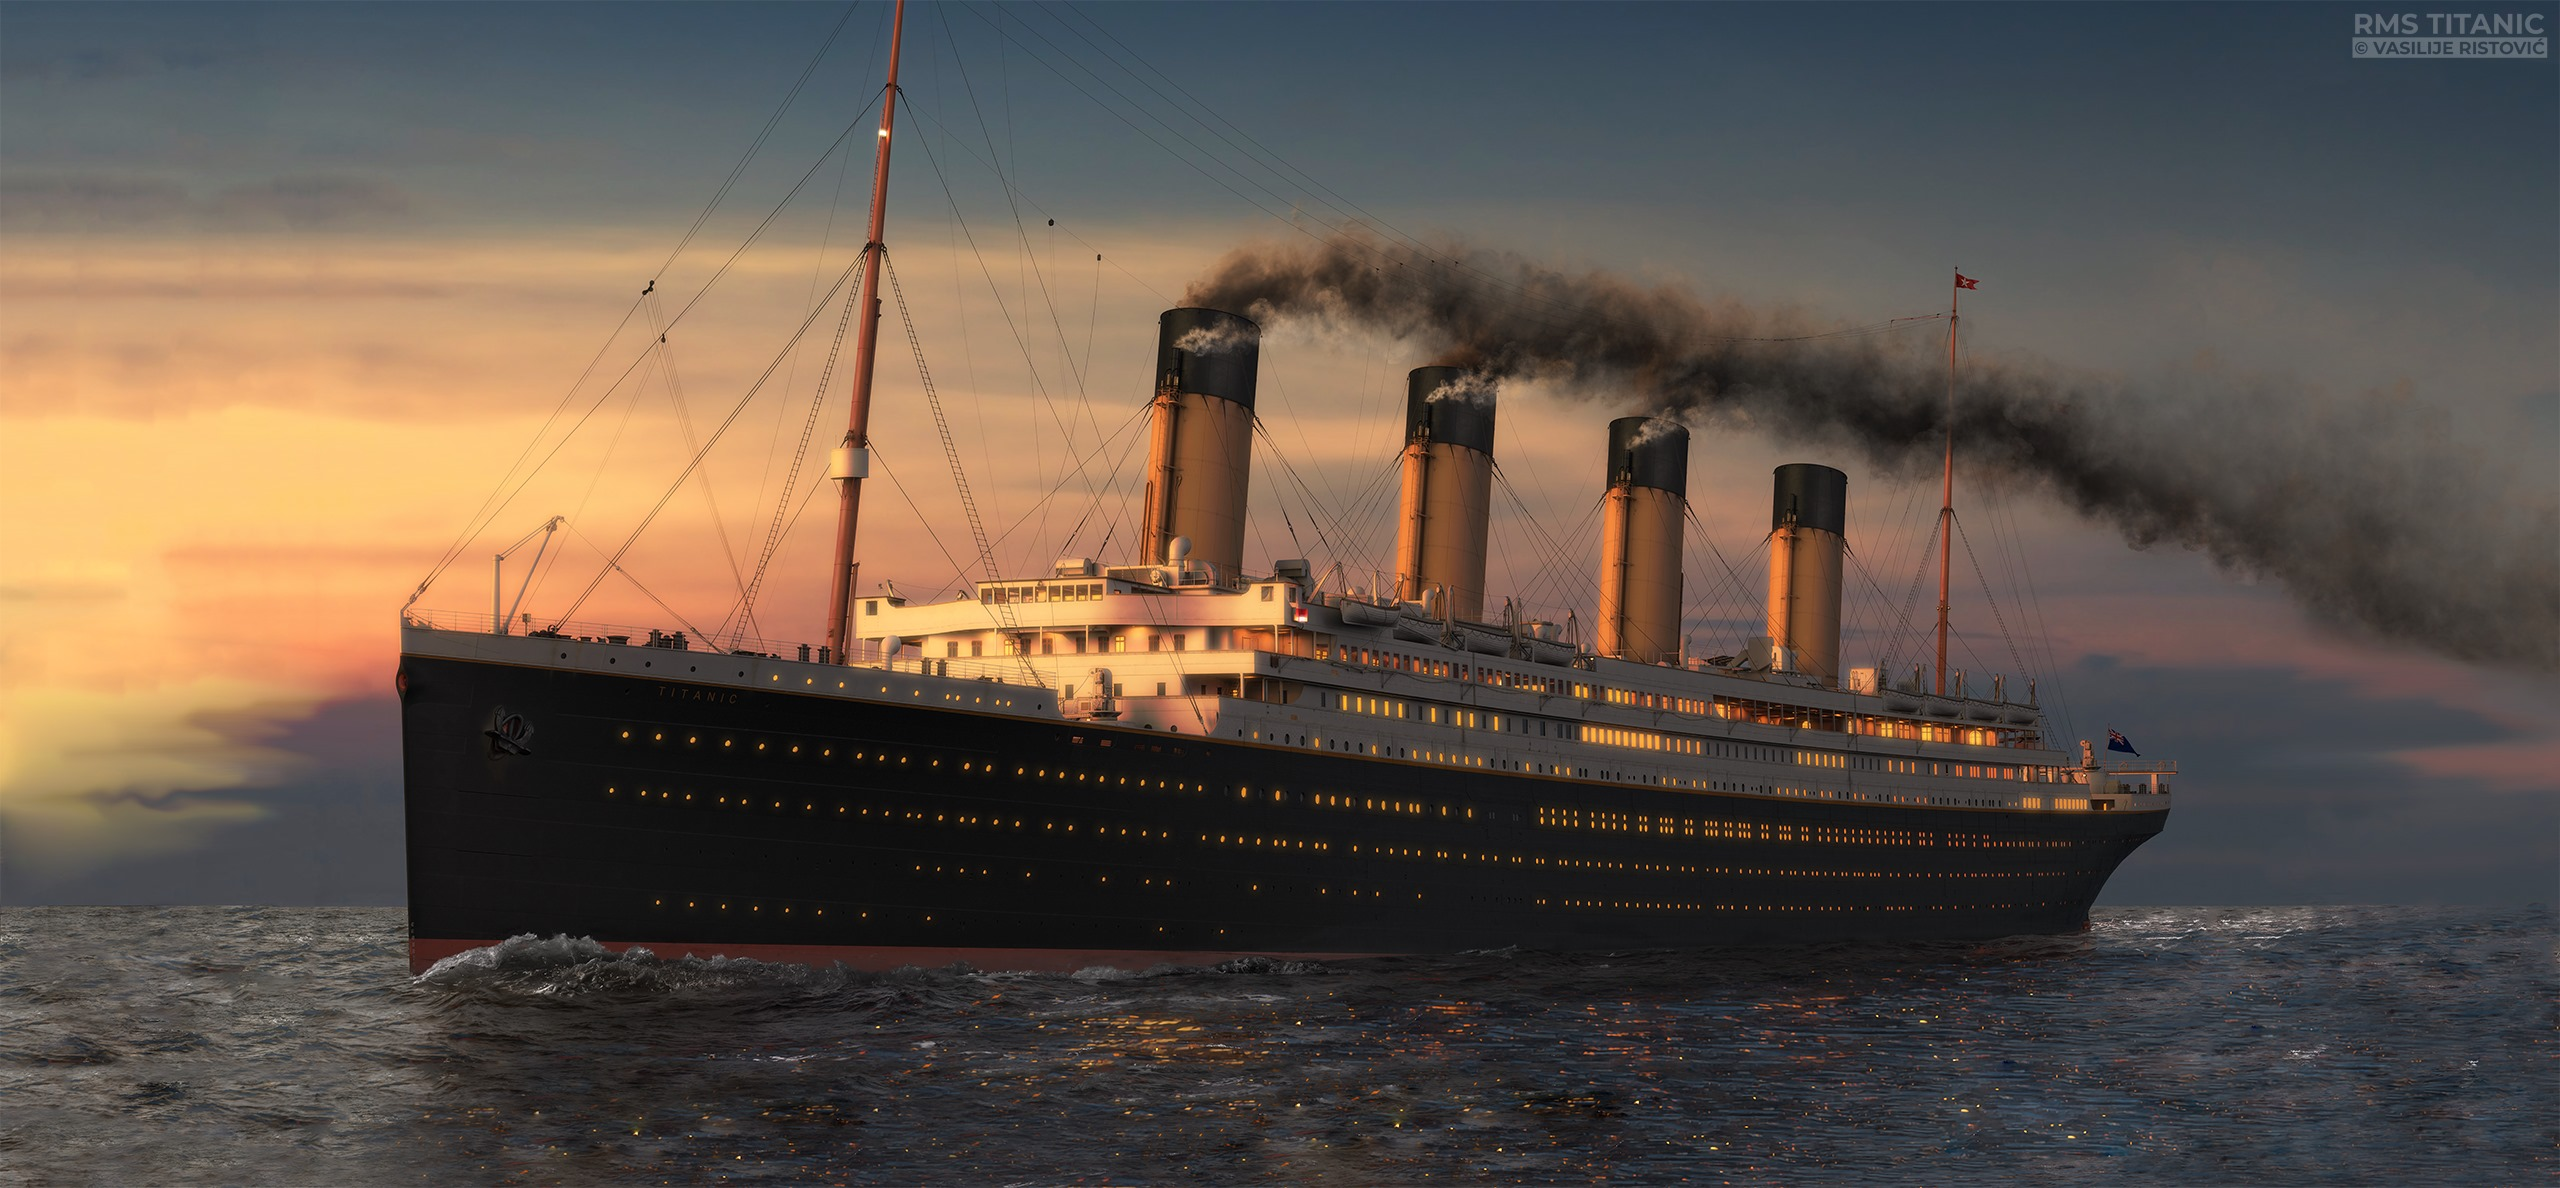

## Background

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## The challenge

The competition is simple: we want you to use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die.

## The data


There are three files in the data: (1) **train.csv**, (2) **test.csv**, and (3) **gender_submission.csv**.

### (1) train.csv

**train.csv** contains the details of a subset of the passengers on board (891 passengers, to be exact -- where each passenger gets a different row in the table). 


The values in the second column (**"Survived"**) can be used to determine whether each passenger survived or not: 
- if it's a "1", the passenger survived.
- if it's a "0", the passenger died.

For instance, the first passenger listed in **train.csv** is Mr. Owen Harris Braund.  He was 22 years old when he died on the Titanic.

### (2) test.csv

Using the patterns you find in **train.csv**, you have to predict whether the other 418 passengers on board (in **test.csv**) survived.  

 Note that **test.csv** does not have a **"Survived"** column - this information is hidden from you, and how well you do at predicting these hidden values will determine how highly you score in the competition! 

### (3) gender_submission.csv

The **gender_submission.csv** file is provided as an example that shows how you should structure your predictions.  It predicts that all female passengers survived, and all male passengers died.  Just like this file, your submission should have:
- a **"PassengerId"** column containing the IDs of each passenger from **test.csv**.
- a **"Survived"** column (that you will create!) with a "1" for the rows where you think the passenger survived, and a "0" where you predict that the passenger died.


In [ ]:
#import libraries
import numpy as np 
import pandas as pd 



## Load the data

First, we need to download and load the data.

In [ ]:
#this is just used to download the data, you don't need to worry about this.
!wget https://raw.githubusercontent.com/haritha-j/alchemize/main/titanic/train.csv
!wget https://raw.githubusercontent.com/haritha-j/alchemize/main/titanic/test.csv
!wget https://raw.githubusercontent.com/haritha-j/alchemize/main/titanic/gender_submission.csv


In [ ]:
# now lets load the training data
train_data = pd.read_csv("train.csv")
train_data.head()

The output above corresponds to the first five rows of the table in **train.csv**. 

So what does this data mean? The following table will help you understand the above data.

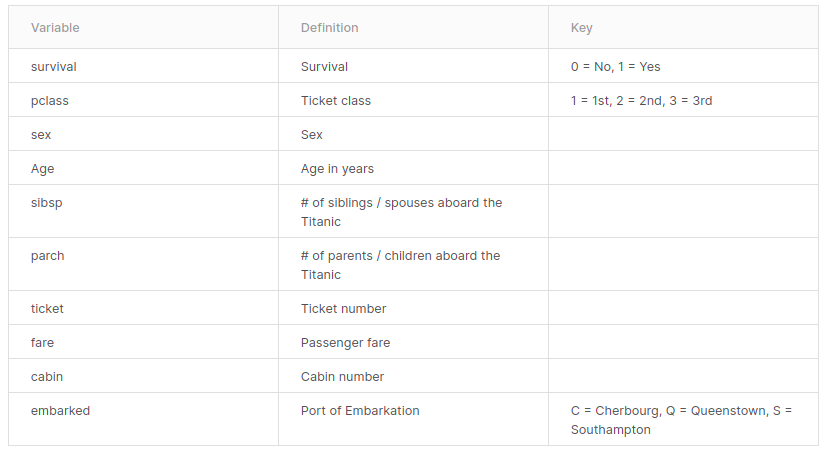

### Variable Notes

pclass: A proxy for socio-economic status (SES)\
1st = Upper\
2nd = Middle\
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...\
Sibling = brother, sister, stepbrother, stepsister\
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...\
Parent = mother, father\
Child = daughter, son, stepdaughter, stepson\
Some children travelled only with a nanny, therefore parch=0 for them.

In [ ]:
# while we're at it, let's load the contents of the test file as well
test_data = pd.read_csv("test.csv")
test_data.head()

As before, make sure that you see the output above in your notebook before continuing.  

Once all of the code runs successfully, all of the data (in **train.csv** and **test.csv**) is loaded in the notebook.  (_The code above shows only the first 5 rows of each table, but all of the data is there -- all 891 rows of **train.csv** and all 418 rows of **test.csv**!_)

# Part 3: Improve your score


It might initially feel overwhelming to look for patterns, when there's so much data to sort through.  So, we'll start simple.

## Explore a pattern

Remember that the sample submission file in **gender_submission.csv** assumes that all female passengers survived (and all male passengers died).  

Is this a reasonable first guess?  We'll check if this pattern holds true in the data (in **train.csv**).


In [ ]:
# find all women
women = train_data.loc[train_data.Sex == 'female']["Survived"]

total_women_on_board = len(women)
women_who_survived = sum(women)

# remember that sum(women) takes the sum of all the female passenges wwho survived, and len(women) gives
# the number of all women on board.

print("There were", total_women_on_board, "women on the ship. Out of them,", women_who_survived, "survived.")

The code above calculates the percentage of female passengers (in **train.csv**) who survived.


In [ ]:
# find all women
men = train_data.loc[train_data.Sex == 'male']["Survived"]

total_men_on_board = len(men)
men_who_survived = sum(men)

print("There were", total_men_on_board, "men on the ship. Out of them,", men_who_survived, "survived.")

## Task 1 - Visualize

We did quite a lot of work on visualization in class. It's time to apply that knowledge. 

In the below cell, you'll find some code that draws a pie chart. Try running it. There are 2 copies of the same code in the two cells below. Your goal is to modify them to show the survival rates of men and women in pie charts.

In [ ]:
# import and setup
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
pies = ['Looks like pacman', 'Doesnt look like pacman' ]
values = [90,20]
ax.pie(values, labels = pies, startangle=30, colors=("yellow","black"))
plt.show()


Modify the below copy of the code to show the survival rate of women. Show the survivors in blue, and the unlucky ones in black.

In [ ]:
# import and setup
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
pies = ['Looks like pacman', 'Doesnt look like pacman' ]
values = [90,20]
ax.pie(values, labels = pies, startangle=30, colors=("yellow","black"))
plt.show()


Modify the below copy of the code to show the survival rate of men. Show the survivors in pink (yes, we're defying gender norms), and the unlucky ones in black.

In [ ]:
# import and setup
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
pies = ['Looks like pacman', 'Doesnt look like pacman' ]
values = [90,20]
ax.pie(values, labels = pies, startangle=30, colors=("yellow","black"))
plt.show()


From this you can see that almost 75% of the women on board survived, whereas only 19% of the men lived to tell about it. Since gender seems to be such a strong indicator of survival, the submission file in **gender_submission.csv** is not a bad first guess, and it makes sense that it performed reasonably well!

BTW, can you guess the reason for the above trend? It seems chivalry was very much alive back then.

But at the end of the day, this gender-based submission bases its predictions on only a single column.  As you can imagine, by considering multiple columns, we can discover more complex patterns that can potentially yield better-informed predictions.  Since it is quite difficult to consider several columns at once (or, it would take a long time to consider all possible patterns in many different columns simultaneously), we'll use machine learning to automate this for us.

## Let's build a machine learning model

We'll build what's known as a **random forest model**.  This model is constructed of several "trees" (there are three trees in the picture below, but we'll construct 100!) that will individually consider each passenger's data and vote on whether the individual survived. (Each of these is a simple decision tree) Then, the random forest model makes a democratic decision: the outcome with the most votes wins!

![](https://i.imgur.com/AC9Bq63.png)

The code cell below looks for patterns in four different columns (**"Pclass"**, **"Sex"**, **"SibSp"**, and **"Parch"**) of the data.  It constructs the trees in the random forest model based on patterns in the **train.csv** file, before generating predictions for the passengers in **test.csv**.  The code also saves these new predictions in a CSV file **my_submission.csv**.

Copy this code into your notebook, and run it in a new code cell.

In [ ]:
# import library
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# set the survival column as our Y column
y = train_data["Survived"]

# select passenger ticket class, sex, and sibling and parent/child information to give as input to our model
features = ["Pclass", "Sex", "SibSp", "Parch"]


remember how in the lesson we completed in class, we skipped variables like sex and race because they weren't numerical values?

We'll this time all the columns we selected are like that (they all contain catagorical values, not numeric ones), so we will convert them to numbers, using the get_dummies function.

The get dummies will simply assign a numerical value to each item. For example, male may be assigned '0', and female may be assigned '1'.

In [ ]:
# convert categorical data to numbers
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])


Next Let's create a simple model and train it, and get predictions

In [ ]:
# create a random forest model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# train the model with the inputs (x) and the expected outputs (y)
model.fit(X, y)

# get predictions on our test inputs (x_test)
predictions = model.predict(X_test)

In [ ]:
#finally let's save our predictions as a csv file
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('results.csv', index=False)
output.head()

### Task 2 - Add additional features

We've only used 4 features in the above model. Let's try to add a couple more.

a. Add port of embarkation to the above set of features and recompute the results.

b. (Extra credit) Try to add an extra feature that indicates whether a person is an adult or a child. You would have to derive this feature from the age of the passenger. Recompute the results.

#### That's the end of the exercise. Congratulations! 
#### Please upload this notebook and the results.csv file to the homework submission form.

run the code below to download the results.csv file to your computer.

In [ ]:
from google.colab import files
files.download('results.csv') 